In [22]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [23]:
# Create a set of random latitude and longitude combinations.   6.1.4
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [24]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [25]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [26]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [27]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | amderma
City not found. Skipping...
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | zolotkovo
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | ponta do sol
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | kostomuksha
Processing Record 12 of Set 1 | camacha
Processing Record 13 of Set 1 | beringovskiy
Processing Record 14 of Set 1 | noyabrsk
Processing Record 15 of Set 1 | zhuzhou
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | puri
Processing Record 18 of Set 1 | nuuk
Processing Record 19 of Set 1 | locri
Processing Record 20 of Set 1 | barentu
Processing Record 21 of Set 1 | nyiracsa

Processing Record 38 of Set 4 | mercedes
Processing Record 39 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 40 of Set 4 | longyearbyen
Processing Record 41 of Set 4 | salina cruz
Processing Record 42 of Set 4 | conceicao da barra
Processing Record 43 of Set 4 | rolim de moura
City not found. Skipping...
Processing Record 44 of Set 4 | inuvik
Processing Record 45 of Set 4 | luderitz
Processing Record 46 of Set 4 | doctor juan manuel frutos
Processing Record 47 of Set 4 | riachao do jacuipe
Processing Record 48 of Set 4 | isangel
Processing Record 49 of Set 4 | erenhot
Processing Record 50 of Set 4 | ahuimanu
Processing Record 1 of Set 5 | georgetown
Processing Record 2 of Set 5 | saleaula
City not found. Skipping...
Processing Record 3 of Set 5 | sernur
Processing Record 4 of Set 5 | talnakh
Processing Record 5 of Set 5 | san fernando
Processing Record 6 of Set 5 | camalu
Processing Record 7 of Set 5 | pochutla
Processing Record 8 of Set 5 | gladstone
Processing Re

Processing Record 26 of Set 8 | sao joao da barra
Processing Record 27 of Set 8 | seoul
Processing Record 28 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 29 of Set 8 | san cristobal
Processing Record 30 of Set 8 | farmington
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | half moon bay
Processing Record 33 of Set 8 | umm lajj
Processing Record 34 of Set 8 | takoradi
Processing Record 35 of Set 8 | belyy yar
Processing Record 36 of Set 8 | cockburn town
Processing Record 37 of Set 8 | riviere-au-renard
Processing Record 38 of Set 8 | yeppoon
Processing Record 39 of Set 8 | kismayo
Processing Record 40 of Set 8 | domoni
Processing Record 41 of Set 8 | kieta
Processing Record 42 of Set 8 | sioux lookout
Processing Record 43 of Set 8 | sorong
Processing Record 44 of Set 8 | waseca
Processing Record 45 of Set 8 | nemuro
Processing Record 46 of Set 8 | madaoua
Processing Record 47 of Set 8 | stralsund
Processing Record 48 of Set 8

Processing Record 11 of Set 12 | sayyan
Processing Record 12 of Set 12 | touros
Processing Record 13 of Set 12 | nara
Processing Record 14 of Set 12 | guiong
Processing Record 15 of Set 12 | snasa
Processing Record 16 of Set 12 | broken hill
Processing Record 17 of Set 12 | cabedelo
Processing Record 18 of Set 12 | zambezi
Processing Record 19 of Set 12 | le port
Processing Record 20 of Set 12 | marienburg
Processing Record 21 of Set 12 | galgani
City not found. Skipping...
Processing Record 22 of Set 12 | mikhaylovskoye
Processing Record 23 of Set 12 | wuda
Processing Record 24 of Set 12 | bandar-e lengeh
Processing Record 25 of Set 12 | ejido
Processing Record 26 of Set 12 | miraflores
Processing Record 27 of Set 12 | tarakan
Processing Record 28 of Set 12 | vilyuysk
Processing Record 29 of Set 12 | sorvag
City not found. Skipping...
Processing Record 30 of Set 12 | usevya
Processing Record 31 of Set 12 | zadar
Processing Record 32 of Set 12 | severomorsk
Processing Record 33 of Set 

In [48]:
len(city_data)

564

In [61]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,-8.72,61,92,7.70,GL,2022-01-26 20:37:59
1,Bluff,-46.6000,168.3333,53.80,63,73,14.05,NZ,2022-01-26 20:37:28
2,Hermanus,-34.4187,19.2345,66.79,82,99,13.44,ZA,2022-01-26 20:36:16
3,Zolotkovo,55.5281,41.1053,-0.54,100,88,1.50,RU,2022-01-26 20:38:02
4,Ponta Do Sol,32.6667,-17.1000,60.71,66,88,8.81,PT,2022-01-26 20:38:03


In [62]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2022-01-26 20:37:59,77.4840,-69.3632,-8.72,61,92,7.70
1,Bluff,NZ,2022-01-26 20:37:28,-46.6000,168.3333,53.80,63,73,14.05
2,Hermanus,ZA,2022-01-26 20:36:16,-34.4187,19.2345,66.79,82,99,13.44
3,Zolotkovo,RU,2022-01-26 20:38:02,55.5281,41.1053,-0.54,100,88,1.50
4,Ponta Do Sol,PT,2022-01-26 20:38:03,32.6667,-17.1000,60.71,66,88,8.81


In [63]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [64]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

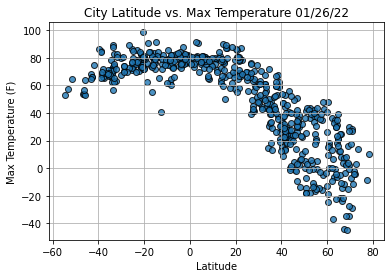

In [65]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

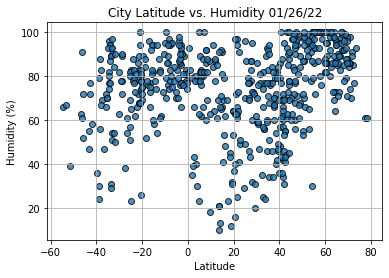

In [66]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

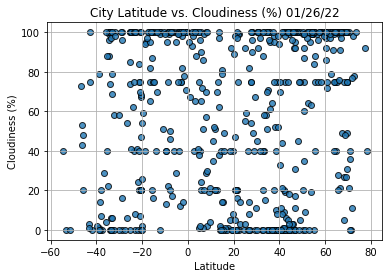

In [67]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

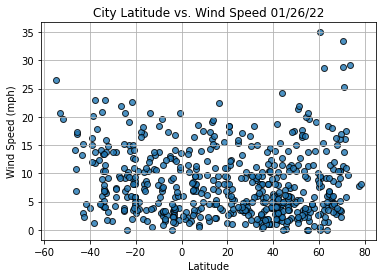

In [68]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()